In [ ]:
pip install turicreate

In [3]:
import turicreate as tc

In [9]:
image_train = tc.SFrame('/content/drive/My Drive/image_train_data/')
image_test = tc.SFrame('/content/drive/My Drive/image_test_data/')
image_train

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


In [10]:
raw_pixel_model = tc.logistic_classifier.create(image_train,target='label',features=['image_array'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 3072

Number of coefficients      : 9219

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.019985  | 1.437674     | 0.271008          | 0.217822            |

| 1         | 11       | 6.815023  | 2.161914     | 0.419643          | 0.435644            |

| 2         | 18       | 1.608527  | 2.996842     | 0.425420          | 0.455446            |

| 3         | 23       | 1.226700  | 3.633445     | 0.438550          | 0.485149            |

| 4         | 24       | 1.226700  | 3.911964     | 0.444328          | 0.495050            |

| 9         | 32       | 1.000000  | 5.473854     | 0.527836          | 0.485149            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

,SArray
0,
1,
2,

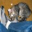
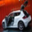
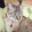

In [15]:
image_test[0:3]['image'].explore()

In [16]:
image_test[0:3]['label']

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [17]:
raw_pixel_model.predict(image_test[0:3])

dtype: str
Rows: 3
['bird', 'cat', 'bird']

In [18]:
raw_pixel_model.evaluate(image_test)

{'accuracy': 0.478, 'auc': 0.7259335833333347, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |    automobile   |  119  |
 |     bird     |       dog       |  187  |
 |     dog      |       cat       |  225  |
 |     dog      |       bird      |  232  |
 |     cat      |    automobile   |  177  |
 |     cat      |       cat       |  325  |
 |     dog      |       dog       |  424  |
 |     cat      |       dog       |  315  |
 |     bird     |       cat       |  156  |
 |  automobile  |    automobile   |  650  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'f1_score': 0.47414351282825484, 'log_loss': 1.1993323045100415, 'precision': 0.

Basically the below code is used to extract the deep Features for our data test

In [ ]:
#deep_learning_model = turicreate.load_model('imagenet_model_iter45')
#image_train['deep_features'] = deep_learning_model.extract_features(image_train)

In [19]:
deep_learning_model = tc.logistic_classifier.create(image_train,target='label',features=['deep_features'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 4096

Number of coefficients      : 12291

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.499515     | 0.749475          | 0.772277            |

| 1         | 6        | 0.250000  | 1.202020     | 0.767332          | 0.732673            |

| 2         | 8        | 0.217737  | 1.748600     | 0.775210          | 0.742574            |

| 3         | 12       | 0.653212  | 2.595590     | 0.789391          | 0.801980            |

| 4         | 14       | 0.799607  | 3.143348     | 0.813550          | 0.801980            |

| 9         | 21       | 1.000000  | 5.461883     | 0.923845          | 0.811881            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

,SArray
0,
1,
2,

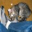
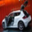
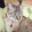

In [20]:
image_test[0:3]['image'].explore()

In [21]:
deep_learning_model.predict(image_test[0:3])

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [22]:
deep_learning_model.evaluate(image_test)

{'accuracy': 0.789, 'auc': 0.9395274166666636, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |       cat       |  203  |
 |     bird     |       bird      |  791  |
 |  automobile  |       bird      |   19  |
 |  automobile  |    automobile   |  956  |
 |     bird     |    automobile   |   16  |
 |     cat      |       cat       |  675  |
 |     bird     |       cat       |  131  |
 |     cat      |       dog       |  228  |
 |     dog      |       dog       |  734  |
 |     dog      |    automobile   |   13  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'f1_score': 0.7897603982659321, 'log_loss': 0.5968091195159084, 'precision': 0.7